In [2]:
%matplotlib inline
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from qutip import *

<h1 align="center">Five coupled Harmonic oscillators</h1> 
<h3 align="center"><a href="https://github.com/chrishalkias/undergraduate-thesis"> GitHub repo page</a></h3>

# Harmonic oscillator Bath

Here we will continue our treatment of the Harmonic Oscillator Bath problem. Again we will consider a $m$-dimentional Harmonic oscillator in a given initial state (maybe a definite energy eigenstate or a superposition of such). The difference being that now our "bath" will be a real bath of Harmonic Oscillators (N in number) where N will be a definite number.

## The system

In [5]:
d=10                     # Dimension of the Hilbert space
n=0                      # The occupied state
syst =  basis(d,n)       # Create the state
rho = syst * syst.dag()  # Create the state density matrix 

## The Environment (10 x 4 model)

In [6]:
N = 4                    # number of bath oscillators
bath = []                # initiate a matrix Nxd blank matrix
for i in range(N):
    state = rand_ket(d)
    bath.append(state)
    
epsilon = [1,1,1,1,1,1]    # oscillator energies 

#print(bath[0])
#len(bath)
bath

[Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
 Qobj data =
 [[-0.34301524+0.36254336j]
  [-0.06135817+0.37872288j]
  [-0.03251298+0.07053347j]
  [ 0.36464006-0.22037529j]
  [-0.09744444+0.30219501j]
  [-0.0357546 +0.00192492j]
  [ 0.2380824 -0.13023131j]
  [ 0.21308872+0.01885863j]
  [-0.37947157-0.06762913j]
  [ 0.19652138+0.08630799j]],
 Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
 Qobj data =
 [[ 0.12271151-0.31777855j]
  [ 0.04229842-0.20962253j]
  [ 0.13640763-0.27880768j]
  [-0.26857815+0.1136911j ]
  [-0.01554542+0.20476897j]
  [ 0.11405605-0.3208223j ]
  [ 0.17808513-0.10577099j]
  [ 0.32978204-0.33344058j]
  [ 0.29067584+0.14338999j]
  [ 0.20739599-0.29633206j]],
 Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
 Qobj data =
 [[-0.1987447 +0.17658364j]
  [-0.19595694+0.22729856j]
  [ 0.33585418-0.23671137j]
  [ 0.30133667-0.27844462j]
  [ 0.13213823+0.13556584j]
  [-0.03556913-0.26275711j]
  [-0.31297769-0.15658113j]
  [ 0.

In [7]:
def total_state():
    state = tensor(syst)
    for i in range(N):
        total_state = tensor(state,bath[i])
        state = total_state
    return total_state
total_state()

Quantum object: dims = [[10, 10, 10, 10, 10], [1, 1, 1, 1, 1]], shape = (100000, 1), type = ket
Qobj data =
  (0, 0)	(0.008121495621333442+0.013935905857987044j)
  (1, 0)	(-0.005095222938388926-0.015819911192283993j)
  (2, 0)	(0.008436868826392545-0.011378859515019124j)
  (3, 0)	(0.006696425744425614-0.0040159754691124535j)
  (4, 0)	(-0.01279414224062823+0.003258276252001256j)
  (5, 0)	(0.00649970697974217+0.00035106514985648596j)
  (6, 0)	(0.005450104101208277-0.013135546656103036j)
  (7, 0)	(-0.011889543796595375-0.012403020900202864j)
  (8, 0)	(-0.017725968511714166+0.0114246449742995j)
  (9, 0)	(0.007234804822227168+0.005818874982958522j)
  (10, 0)	(0.011171193931146087+0.014377657785943986j)
  (11, 0)	(-0.008066995297546859-0.016938232444400125j)
  (12, 0)	(0.007737794859845727-0.013993261783393236j)
  (13, 0)	(0.006891723691707507-0.005494891297547918j)
  (14, 0)	(-0.013827558987086585+0.005559148152849593j)
  (15, 0)	(0.007324788389838158-0.0005793491882139805j)
  (16, 0)	(0.004

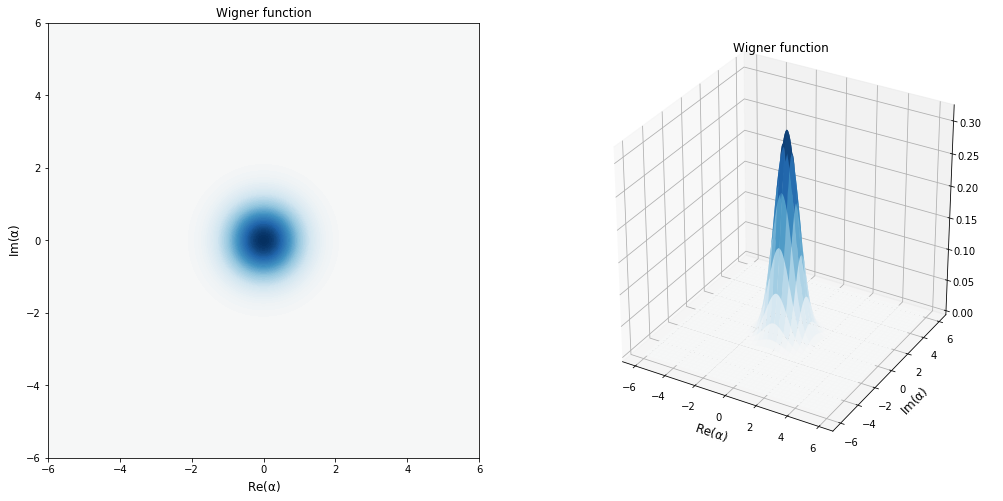

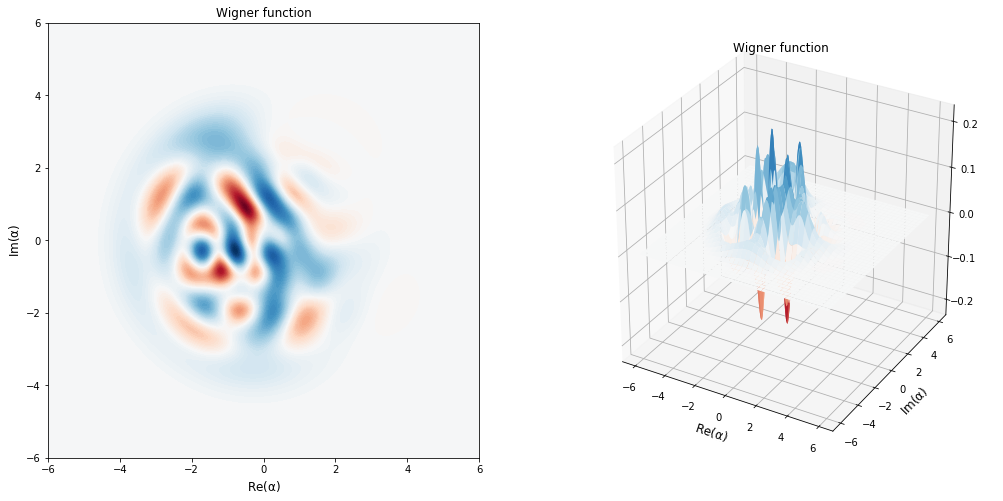

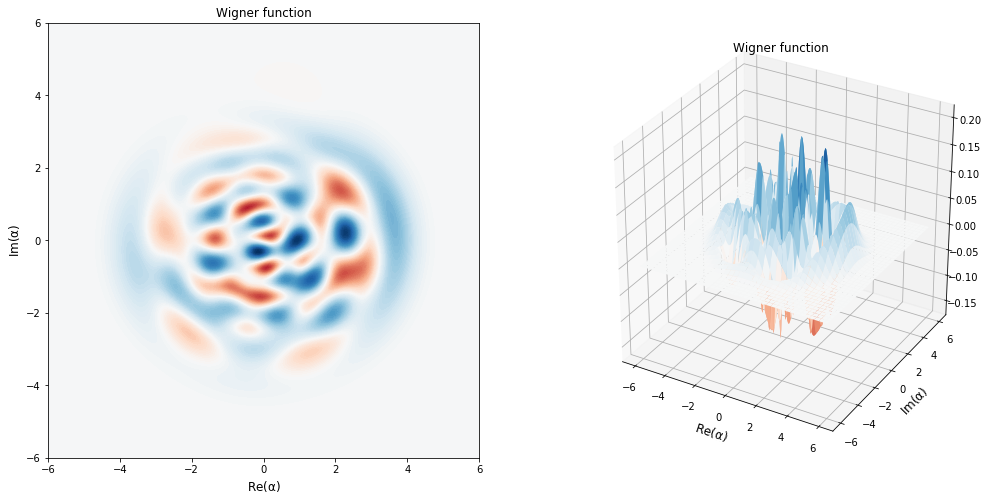

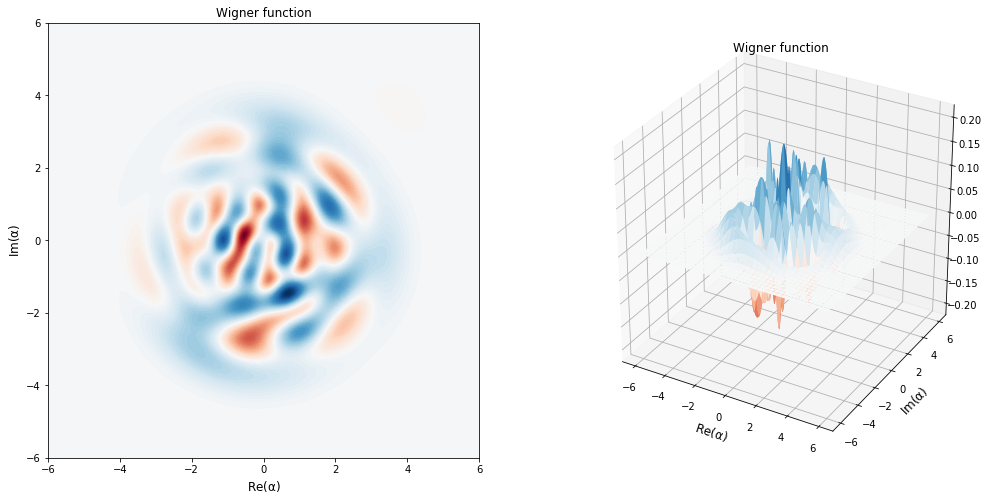

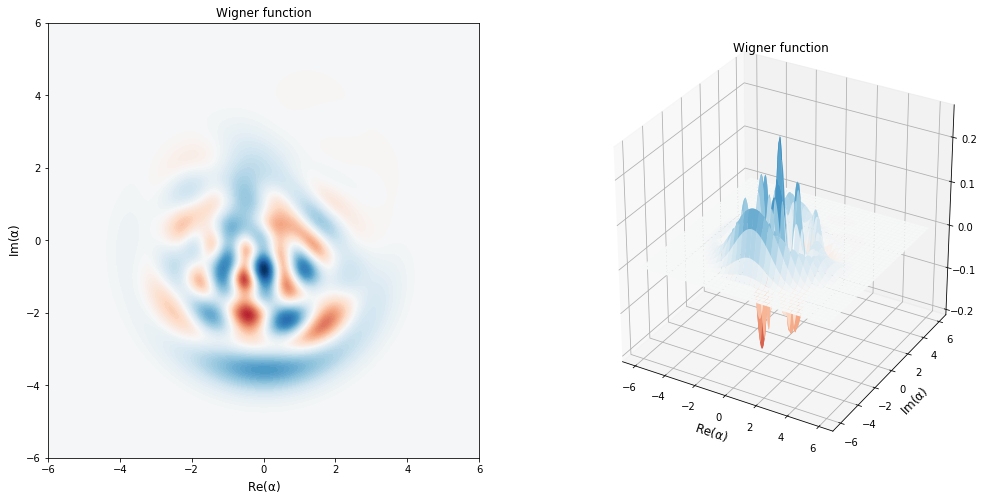

In [11]:
def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(psi, fig=fig, ax=ax, alpha_max=6);

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(psi, fig=fig, ax=ax, projection='3d', alpha_max=6);
    
    plt.close(fig)
    return fig

def preview():
    for n in range(N+1):
        if n == 0:
            psi = syst
        else:    
            psi = bath[n-1]
        display(plot_wigner_2d_3d(psi))
preview()

The following gives `MemoryError: Unable to allocate 149. GiB for an array with shape (100000, 100000) and data type complex128`. First problem....

In [12]:
#hinton(total_state() * total_state().dag())

MemoryError: Unable to allocate 149. GiB for an array with shape (100000, 100000) and data type complex128

## The operators

In [14]:
def bath_operators(n):   
    old_op = qeye(d)     
    for i in range(N+1):                           
        if i == n:
            op = tensor(old_op,destroy(d))
        else:
            op = tensor(old_op,qeye(d))
        old_op = op
    return op

def system_operators():                       #define system anhiliation operator         
    a = destroy(d)
    for i in range(N+1):
        a_system = tensor(a,qeye(d))
        a = a_system
    return a_system 

a_n = [bath_operators(i) for i in range(N+1)] # create a matrix of those tensors
a_n[0] = system_operators()

In [15]:
def free_Hamiltonian():
    H_free = Qobj()                        
    for i in range(N+1):
        H_free += epsilon[i] * a_n[i] * a_n[i].dag()
    return H_free
    
def interaction_Hamiltonian():
    H_int = Qobj()
    couplings = [0.1 for i in range(N)]
    interaction_operators = [couplings[i] * a_n[i] for i in range(N)]
    for j in range(N):
        H_int += a_n[0] * interaction_operators[j].dag() + a_n[0].dag() * interaction_operators[j]
    return H_int


def total_Hamiltonian():
    return free_Hamiltonian() + interaction_Hamiltonian()

In [26]:
 total_Hamiltonian() #kernel dies sometimes

Quantum object: dims = [[10, 10, 10, 10, 10, 10], [10, 10, 10, 10, 10, 10]], shape = (1000000, 1000000), type = oper, isherm = True
Qobj data =
  (0, 0)	(5.1+0j)
  (1, 1)	(6.1+0j)
  (2, 2)	(7.1+0j)
  (3, 3)	(8.1+0j)
  (4, 4)	(9.1+0j)
  (5, 5)	(10.1+0j)
  (6, 6)	(11.1+0j)
  (7, 7)	(12.100000000000001+0j)
  (8, 8)	(13.1+0j)
  (9, 9)	(4.1+0j)
  (10, 10)	(6.1+0j)
  (10, 100000)	(0.1+0j)
  (11, 11)	(7.1+0j)
  (11, 100001)	(0.1+0j)
  (12, 12)	(8.1+0j)
  (12, 100002)	(0.1+0j)
  (13, 13)	(9.1+0j)
  (13, 100003)	(0.1+0j)
  (14, 14)	(10.1+0j)
  (14, 100004)	(0.1+0j)
  (15, 15)	(11.1+0j)
  (15, 100005)	(0.1+0j)
  (16, 16)	(12.1+0j)
  (16, 100006)	(0.1+0j)
  (17, 17)	(13.100000000000001+0j)
  :	:
  (999982, 999982)	(12.9+0j)
  (999983, 899993)	(0.9000000000000001+0j)
  (999983, 999983)	(13.9+0j)
  (999984, 899994)	(0.9000000000000001+0j)
  (999984, 999984)	(14.9+0j)
  (999985, 899995)	(0.9000000000000001+0j)
  (999985, 999985)	(15.9+0j)
  (999986, 899996)	(0.9000000000000001+0j)
  (999986, 999986)

In [13]:
total_Hamiltonian().eigenenergies()

NameError: name 'total_Hamiltonian' is not defined

The following gives `Overflow Error: Value too large`

<h2 align="center"> ~A Quantum Computer is required for this calculation~ </h2>

In [31]:
#tlist = np.linspace(0, 1, int(10)) # list of times for which the solver should store the state vector
#result = mesolve(total_Hamiltonian() , total_state, tlist, [], [])

OverflowError: value too large

In [42]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.0
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.1.3
Cython,0.29.17
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,7.12.0
Python,"3.7.5 (default, Apr 19 2020, 20:18:17) [GCC 9.2.1 20191008]"
OS,posix [linux]
